New data, epoch 0
Step 0 Loss 0.704625
Step 100 Loss 0.534084
Step 200 Loss 0.48908
Step 300 Loss 0.0372305
Step 400 Loss 0.0102687
Step 500 Loss 0.00743143
Step 600 Loss 0.00490731
New data, epoch 1
Step 0 Loss 0.59807
Step 100 Loss 0.00392425
Step 200 Loss 0.00320589
Step 300 Loss 0.00270648
Step 400 Loss 0.00208443
Step 500 Loss 0.00190509
Step 600 Loss 0.00157493
New data, epoch 2
Step 0 Loss 0.221405
Step 100 Loss 0.00150988
Step 200 Loss 0.00133704
Step 300 Loss 0.00114285
Step 400 Loss 0.000996894
Step 500 Loss 0.00109449
Step 600 Loss 0.000937742
New data, epoch 3
Step 0 Loss 0.424305
Step 100 Loss 0.000968008
Step 200 Loss 0.000554939
Step 300 Loss 0.000722957
Step 400 Loss 0.000595977
Step 500 Loss 0.000602574
Step 600 Loss 0.000702473
New data, epoch 4
Step 0 Loss 0.726588
Step 100 Loss 0.000710863
Step 200 Loss 0.000666996
Step 300 Loss 0.000492733
Step 400 Loss 0.00057057
Step 500 Loss 0.000619652
Step 600 Loss 0.000497405
New data, epoch 5
Step 0 Loss 0.762787
Step 100 Lo

Step 100 Loss 0.000146124
Step 200 Loss 0.000149202
Step 300 Loss 0.000123413
Step 400 Loss 0.000132122
Step 500 Loss 0.000154126
Step 600 Loss 0.000138596
New data, epoch 43
Step 0 Loss 0.455362
Step 100 Loss 0.000166493
Step 200 Loss 0.000123001
Step 300 Loss 0.000145201
Step 400 Loss 0.000120376
Step 500 Loss 0.000117012
Step 600 Loss 0.000109566
New data, epoch 44
Step 0 Loss 0.562507
Step 100 Loss 0.000135091
Step 200 Loss 0.000127987
Step 300 Loss 0.000106245
Step 400 Loss 0.000122
Step 500 Loss 0.000114116
Step 600 Loss 0.000120038
New data, epoch 45
Step 0 Loss 0.573835
Step 100 Loss 0.000113487
Step 200 Loss 0.000103749
Step 300 Loss 0.000340648
Step 400 Loss 9.58561e-05
Step 500 Loss 0.000115303
Step 600 Loss 0.000110161
New data, epoch 46
Step 0 Loss 0.677994
Step 100 Loss 8.67076e-05
Step 200 Loss 0.000119001
Step 300 Loss 0.000102518
Step 400 Loss 0.000106642
Step 500 Loss 9.86981e-05
Step 600 Loss 0.000106452
New data, epoch 47
Step 0 Loss 0.269217
Step 100 Loss 0.0001188

Step 200 Loss 8.62297e-05
Step 300 Loss 7.74296e-05
Step 400 Loss 8.80032e-05
Step 500 Loss 7.8788e-05
Step 600 Loss 7.95057e-05
New data, epoch 85
Step 0 Loss 0.254146
Step 100 Loss 7.78441e-05
Step 200 Loss 8.01007e-05
Step 300 Loss 8.04547e-05
Step 400 Loss 7.55046e-05
Step 500 Loss 8.04696e-05
Step 600 Loss 7.22694e-05
New data, epoch 86
Step 0 Loss 0.625332
Step 100 Loss 6.67654e-05
Step 200 Loss 7.63051e-05
Step 300 Loss 7.15496e-05
Step 400 Loss 9.79495e-05
Step 500 Loss 8.14199e-05
Step 600 Loss 0.000131757
New data, epoch 87
Step 0 Loss 0.324879
Step 100 Loss 9.6536e-05
Step 200 Loss 7.85243e-05
Step 300 Loss 7.70789e-05
Step 400 Loss 8.64653e-05
Step 500 Loss 6.98907e-05
Step 600 Loss 6.92822e-05
New data, epoch 88
Step 0 Loss 0.268371
Step 100 Loss 8.0759e-05
Step 200 Loss 8.92485e-05
Step 300 Loss 8.65086e-05
Step 400 Loss 8.49166e-05
Step 500 Loss 6.99069e-05
Step 600 Loss 7.5087e-05
New data, epoch 89
Step 0 Loss 0.586228
Step 100 Loss 7.97343e-05
Step 200 Loss 7.0927e-05

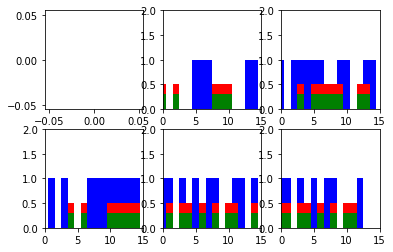

In [2]:
# Using the RNN LSTMCell from TensorFlow

# Imports
from __future__ import print_function, division
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Parameters
num_epochs = 100
total_series_length = 50000
truncated_backprop_length = 15
state_size = 4
num_classes = 2
echo_step = 3
batch_size = 5
num_batches = total_series_length//batch_size//truncated_backprop_length

def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0

    x = x.reshape((batch_size, -1))  # The first index changing slowest, subseries as rows
    y = y.reshape((batch_size, -1))

    return (x, y)

batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

cell_state = tf.placeholder(tf.float32, [batch_size, state_size])
hidden_state = tf.placeholder(tf.float32, [batch_size, state_size])
init_state = tf.contrib.rnn.LSTMStateTuple(cell_state, hidden_state)

W2 = tf.Variable(np.random.rand(state_size, num_classes),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,num_classes)), dtype=tf.float32)

# Unpack columns
inputs_series = tf.split(batchX_placeholder, truncated_backprop_length, axis=1)
labels_series = tf.unstack(batchY_placeholder, axis=1)

# Forward passes
cell = tf.contrib.rnn.BasicLSTMCell(state_size, state_is_tuple=True)
states_series, current_state = tf.contrib.rnn.static_rnn(cell, inputs_series, init_state)

# For each state captured in states_series, compute the output
logits_series = [tf.matmul(state, W2) + b2 for state in states_series] #Broadcasted addition

# Predicted output using softmax
predictions_series = [tf.nn.softmax(logits) for logits in logits_series]

# Cross-entropy loss
losses = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels) for logits, labels in zip(logits_series,labels_series)]

# Total loss is the average across all losses
total_loss = tf.reduce_mean(losses)

# Run the back-prop to minimize total_loss
train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)

def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(5):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)

# Run the training
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []

    for epoch_idx in range(num_epochs):
        x,y = generateData()
        _current_cell_state = np.zeros((batch_size, state_size))
        _current_hidden_state = np.zeros((batch_size, state_size))

        print("New data, epoch", epoch_idx)

        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length

            batchX = x[:,start_idx:end_idx]
            batchY = y[:,start_idx:end_idx]
            
            #print('batchX: ', batchX)
            #print('batchY: ', batchY)

            _total_loss, _train_step, _current_state, _predictions_series = sess.run(
                [total_loss, train_step, current_state, predictions_series],
                feed_dict={
                    batchX_placeholder: batchX,
                    batchY_placeholder: batchY,
                    cell_state: _current_cell_state,
                    hidden_state: _current_hidden_state
                })

            _current_cell_state, _current_hidden_state = _current_state

            if batch_idx%100 == 0:
                print("Step",batch_idx, "Loss", _total_loss)
                plot(loss_list, _predictions_series, batchX, batchY)

plt.ioff()
plt.show()